In [145]:
import numpy as np
from matplotlib import pyplot as plt

# SAG13 Part

In [10]:
def sag13(Rp_range=[0.5, 16.0], Porb_range=[0.5, 500.0]):
    """
    Draws planet radii and planet orbital periods according to SAG13
    statistics
    (https://ui.adsabs.harvard.edu/abs/2018ApJ...856..122K/abstract)
    """

    # Create lists for planet radii and planet orbital periods
    Rp_sag13 = []
    Porb_sag13 = []

    # Check if host star type suits
    if (True):

    # Use baseline, min or max planet occurrence rates
        Gamma = [0.38, 0.73]
        alpha = [-0.19, -1.18]
        beta = [0.26, 0.59]
        F0 = [2.42, 0.25]
        
        Rp_range=[0.5, 16.0]
        Porb_range=[0.5, 500.0]
        Rbrk = [0., 3.4, np.inf]
        ytod = 365.24
        #
        CR0 = 1./(Rbrk[1]**alpha[0]/alpha[0]-Rp_range[0]**alpha[0]/alpha[0])
        CP0 = 1./((Porb_range[1]/ytod)**beta[0]/beta[0]-(Porb_range[0]/ytod)**beta[0]/beta[0])

        def iCDF_R0(x):
            return (alpha[0]*x/CR0+Rp_range[0]**alpha[0])**(1./alpha[0])
        def iCDF_P0(x):
            return (beta[0]*x/CP0+(Porb_range[0]/ytod)**beta[0])**(1./beta[0])

        # Distribute number of planets per star Poissonian
        for k in range(np.random.poisson(F0[0])):
            dummy1 = iCDF_R0(np.random.rand())
            dummy2 = iCDF_P0(np.random.rand())*ytod

            # Check if planet radius and planet orbital period lie inside range
            if (float(Rp_range[0]) <= dummy1 <= float(Rp_range[1])):
                if (float(Porb_range[0]) <= dummy2 <= float(Porb_range[1])):

                    # Fill lists for planet radii and planet orbital periods
                    Rp_sag13 += [dummy1]
                    Porb_sag13 += [dummy2]

        CR1 = 1./(Rp_range[1]**alpha[1]/alpha[1]-Rbrk[1]**alpha[1]/alpha[1])
        CP1 = 1./((Porb_range[1]/ytod)**beta[1]/beta[1]-(Porb_range[0]/ytod)**beta[1]/beta[1])

        def iCDF_R1(x):
            return (alpha[1]*x/CR1+Rbrk[1]**alpha[1])**(1./alpha[1])
        def iCDF_P1(x):
            return (beta[1]*x/CP1+(Porb_range[0]/ytod)**beta[1])**(1./beta[1])

        # Distribute number of planets per star Poissonian
        for k in range(np.random.poisson(F0[1])):
            dummy1 = iCDF_R1(np.random.rand())
            dummy2 = iCDF_P1(np.random.rand())*ytod

            # Check if planet radius and planet orbital period lie inside range
            if (float(Rp_range[0]) <= dummy1 <= float(Rp_range[1])):
                if (float(Porb_range[0]) <= dummy2 <= float(Porb_range[1])):

                    # Fill lists for planet radii and planet orbital periods
                    Rp_sag13 += [dummy1]
                    Porb_sag13 += [dummy2]

    # Return lists with planet radii and planet orbital periods
    return Rp_sag13, Porb_sag13

In [150]:
def sag13_emile(Rp_range=[0.5, 16.0], Porb_range=[0.5, 500.0], nplanets = False):
    """
    Draws planet radii and planet orbital periods according to SAG13
    statistics
    (https://ui.adsabs.harvard.edu/abs/2018ApJ...856..122K/abstract)
    """

    # Create lists for planet radii and planet orbital periods
    Rp_sag13 = []
    Porb_sag13 = []

    # Check if host star type suits
    if (True):

    # Use baseline, min or max planet occurrence rates
        Gamma = [0.38, 0.73]
        alpha = [-0.19, -1.18]
        beta = [0.26, 0.59]
        F0 = [2.42, 0.25]
        
        Rp_range=[0.5, 16.0]
        Porb_range=[0.5, 500.0]
        Rbrk = [0., 3.4, np.inf]
        ytod = 365.24
        #
        CR0 = 1./(Rbrk[1]**alpha[0]/alpha[0]-Rp_range[0]**alpha[0]/alpha[0])
        CP0 = 1./((Porb_range[1]/ytod)**beta[0]/beta[0]-(Porb_range[0]/ytod)**beta[0]/beta[0])
        CR1 = 1./(Rp_range[1]**alpha[1]/alpha[1]-Rbrk[1]**alpha[1]/alpha[1])
        CP1 = 1./((Porb_range[1]/ytod)**beta[1]/beta[1]-(Porb_range[0]/ytod)**beta[1]/beta[1])

        def iCDF_R0(x):
            return (alpha[0]*x/CR0+Rp_range[0]**alpha[0])**(1./alpha[0])
        
        def iCDF_P0(x):
            return (beta[0]*x/CP0+(Porb_range[0]/ytod)**beta[0])**(1./beta[0])
        
        def iCDF_R1(x):
            return (alpha[1]*x/CR1+Rbrk[1]**alpha[1])**(1./alpha[1])
        
        def iCDF_P1(x):
            return (beta[1]*x/CP1+(Porb_range[0]/ytod)**beta[1])**(1./beta[1])
        
        #We check if a number of planets was specified as input
        if(nplanets == False):
            #If not, we draw it randomly as Poisson
            nplanets = np.random.poisson(np.sum(F0))
            
        # Distribute number of planets per star Poissonian using the sum of the values in F0
        for k in range(nplanets):
            #We randomly select if we are going to draw a planet according to 0 or 1
            rate  = np.random.choice(len(F0), p = F0/np.sum(F0))
            
            if(rate == 0):
                
                dummy1 = iCDF_R0(np.random.rand())
                dummy2 = iCDF_P0(np.random.rand())*ytod

                # Check if planet radius and planet orbital period lie inside range
                if (float(Rp_range[0]) <= dummy1 <= float(Rp_range[1])):
                    if (float(Porb_range[0]) <= dummy2 <= float(Porb_range[1])):
                        # Fill lists for planet radii and planet orbital periods
                        Rp_sag13 += [dummy1]
                        Porb_sag13 += [dummy2]
                        
            elif(rate == 1):
                dummy1 = iCDF_R1(np.random.rand())
                dummy2 = iCDF_P1(np.random.rand())*ytod

                # Check if planet radius and planet orbital period lie inside range
                if (float(Rp_range[0]) <= dummy1 <= float(Rp_range[1])):
                    if (float(Porb_range[0]) <= dummy2 <= float(Porb_range[1])):
                        # Fill lists for planet radii and planet orbital periods
                        Rp_sag13 += [dummy1]
                        Porb_sag13 += [dummy2]
    # Return lists with planet radii and planet orbital periods
    return Rp_sag13, Porb_sag13

In [154]:
radii_jens, radii_emile = [], []
periods_jens, periods_emile = [], []
for i in range(100000):
    temp_jens = sag13()
    temp_emile = sag13_emile()
    try:
        radii_jens += temp_jens[0]
        periods_jens += temp_jens[1]
    except:
        pass
    try:
        radii_emile += temp_emile[0]
        periods_emile += temp_emile[1]
    except:
        pass

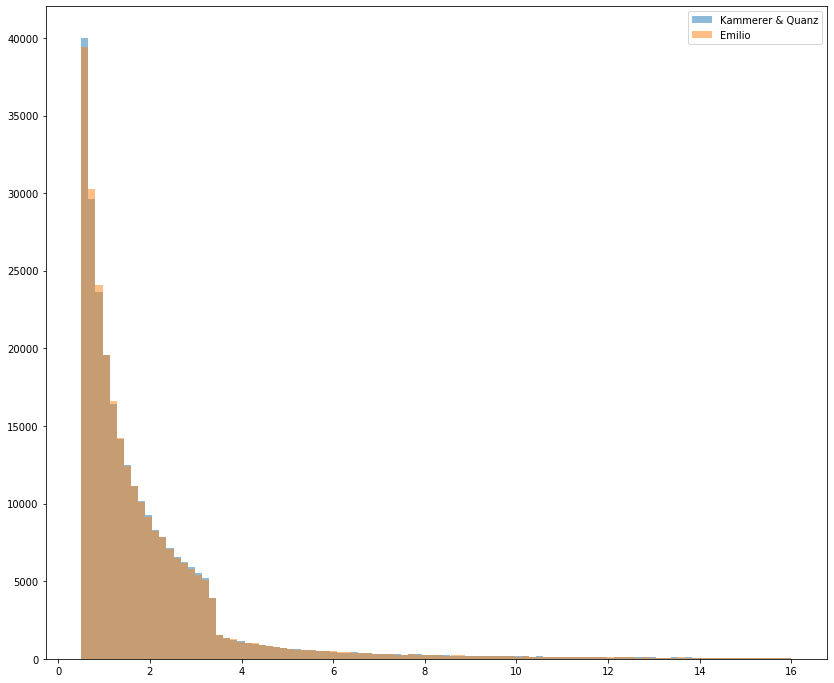

In [162]:
plt.figure(figsize = (14,12))
plt.hist(radii_jens, bins = 100, alpha = 0.5, label = "Kammerer & Quanz")
plt.hist(radii_emile, bins = 100, alpha = 0.5, label = "Emilio")
plt.legend()
plt.show()

In [181]:
sag13_emile(nplanets = 4)

([2.5059403520468866,
  1.7551898010604459,
  0.6913886155066198,
  6.289633654187511],
 [1.9900169711072613,
  219.57625170227072,
  7.235184557515189,
  258.20717079927954])

# Dressing part

In [102]:
def dressing2015(Rp_range=[0.5, 4.0], Porb_range=[0.5, 200.0]):
    """
    Draws planet radii and planet orbital periods according to Dressing &
    Charbonneau 2015 statistics
    (https://ui.adsabs.harvard.edu/abs/2015ApJ...807...45D/abstract)
    """

    # Create lists for planet radii and planet orbital periods
    Rp_dressing2015 = []
    Porb_dressing2015 = []

    # Check if host star type suits
    if (True):

        # Parameters from Dressing 2015
        #These 2 arrays create a grid
        bins_Porb = np.log(np.array([0.5, 1.7, 5.5, 18.2, 60.3, 200.]))
        bins_Rp = np.log(np.array([0.5,
                                   1., 
                                   1.5,
                                   2., 
                                   2.5, 
                                   3.,
                                   3.5,
                                   4.]))
        #For each cell of the grid we have a value of expected number of planet
        rates_extrap = np.array([[0.0138, 0.0842, 0.2059, 0.2559, 0.1276],
                                 [0.0195, 0.0994, 0.3600, 0.2685, 0.2885], 
                                 [0.0041, 0.0415, 0.2341, 0.2459, 0.1998], 
                                 [0.0036, 0.0272, 0.1873, 0.2758, 0.1808], 
                                 [0.0015, 0.0159, 0.0829, 0.1451, 0.0861], 
                                 [0.0006, 0.0065, 0.0325, 0.0337, 0.0197], 
                                 [0.0003, 0.0038, 0.0105, 0.0056, 0.0135]])
               
        err_u_extrap = np.array([[0.0093, 0.0353, 0.0870, 0.1839, 0.2879], [0.0093, 0.0282, 0.0769, 0.1070, 0.2866], [0.0051, 0.0194, 0.0583, 0.0908, 0.1607], [0.0050, 0.0173, 0.0539, 0.0942, 0.1321], [0.0039, 0.0139, 0.0396, 0.0771, 0.0978], [0.0030, 0.0100, 0.0272, 0.0462, 0.0587], [0.0023, 0.0077, 0.0182, 0.0232, 0.0489]])
        err_l_extrap = np.array([[0.0053, 0.0239, 0.0557, 0.0852, 0.0704], [0.0061, 0.0213, 0.0769, 0.0679, 0.1034], [0.0020, 0.0128, 0.0532, 0.0600, 0.0742], [0.0020, 0.0101, 0.0395, 0.0631, 0.0657], [0.0010, 0.0069, 0.0255, 0.0462, 0.0384], [0.0006, 0.0032, 0.0137, 0.0162, 0.0085], [0.0003, 0.0019, 0.0052, 0.0019, 0.0071]])


        F0 = rates_extrap
        

        # Go through all bins
        for i in range(len(bins_Rp)-1):
            for j in range(len(bins_Porb)-1):
                # Distribute number of planets per star Poissonian
                for k in range(np.random.poisson(F0[i, j])):
                    # Draw random planet radius and planet orbital period
                    dummy1 = np.exp(bins_Rp[i]+(bins_Rp[i+1]-bins_Rp[i])*np.random.rand())
                    dummy2 = np.exp(bins_Porb[j]+(bins_Porb[j+1]-bins_Porb[j])*np.random.rand())

                    # Check if planet radius and planet orbital period lie inside range
                    if (float(Rp_range[0]) <= dummy1 <= float(Rp_range[1])):
                        if (float(Porb_range[0]) <= dummy2 <= float(Porb_range[1])):

                            # Fill lists for planet radii and planet orbital periods
                            Rp_dressing2015 += [dummy1]
                            Porb_dressing2015 += [dummy2]

    # Return lists with planet radii and planet orbital periods
    return Rp_dressing2015, Porb_dressing2015

In [142]:
def dressing2015_emile(Rp_range=[0.5, 4.0], Porb_range=[0.5, 200.0], nplanets = False):
    Rp_dressing2015 = []
    Porb_dressing2015 = []
    bins_Porb = np.log(np.array([0.5, 1.7, 5.5, 18.2, 60.3, 200.]))
    bins_Rp = np.log(np.array([0.5,
                               1., 
                               1.5,
                               2., 
                               2.5, 
                               3.,
                               3.5,
                               4.]))
    #For each cell of the grid we have a value of expected number of planet
    rates_extrap = np.array([[0.0138, 0.0842, 0.2059, 0.2559, 0.1276],
                             [0.0195, 0.0994, 0.3600, 0.2685, 0.2885], 
                             [0.0041, 0.0415, 0.2341, 0.2459, 0.1998], 
                             [0.0036, 0.0272, 0.1873, 0.2758, 0.1808], 
                             [0.0015, 0.0159, 0.0829, 0.1451, 0.0861], 
                             [0.0006, 0.0065, 0.0325, 0.0337, 0.0197], 
                             [0.0003, 0.0038, 0.0105, 0.0056, 0.0135]])
    #We create the normalized array of probabilities
    rates_extrap_norm = rates_extrap / np.sum(rates_extrap)

    #We check if a number of planets was specified as input
    if(nplanets == False):
        #If not, we draw it randomly as Poisson
        nplanets = np.random.poisson(np.sum(rates_extrap))
    # Distribute number of planets per star Poissonian using the sum of the values in rates_extrap
    for k in range(nplanets):
        #We select a random cell in the grid using it as a discrete probability array
        cell  = np.random.choice(len(np.concatenate(rates_extra_norm)), p = np.concatenate(rates_extra_norm))
        #We check to which radius and period bin it belongs
        radius_coord = cell // (len(bins_Porb) - 1)
        period_coord = cell % (len(bins_Porb) -1 )

        # Draw random planet radius and planet orbital period
        dummy1 = np.exp(bins_Rp[radius_coord]+(bins_Rp[radius_coord+1]-bins_Rp[radius_coord])*np.random.rand())
        dummy2 = np.exp(bins_Porb[period_coord]+(bins_Porb[period_coord+1]-bins_Porb[period_coord])*np.random.rand())

        # Check if planet radius and planet orbital period lie inside range
        if (float(Rp_range[0]) <= dummy1 <= float(Rp_range[1])):
            if (float(Porb_range[0]) <= dummy2 <= float(Porb_range[1])):

                # Fill lists for planet radii and planet orbital periods
                Rp_dressing2015 += [dummy1]
                Porb_dressing2015 += [dummy2]
        # Return lists with planet radii and planet orbital periods
    return Rp_dressing2015, Porb_dressing2015

In [143]:
radii_jens, radii_emile = [], []
periods_jens, periods_emile = [], []
for i in range(100000):
    temp_jens = dressing2015()
    temp_emile = dressing2015_emile()
    try:
        radii_jens += temp_jens[0]
        periods_jens += temp_jens[1]
    except:
        pass
    try:
        radii_emile += temp_emile[0]
        periods_emile += temp_emile[1]
    except:
        pass

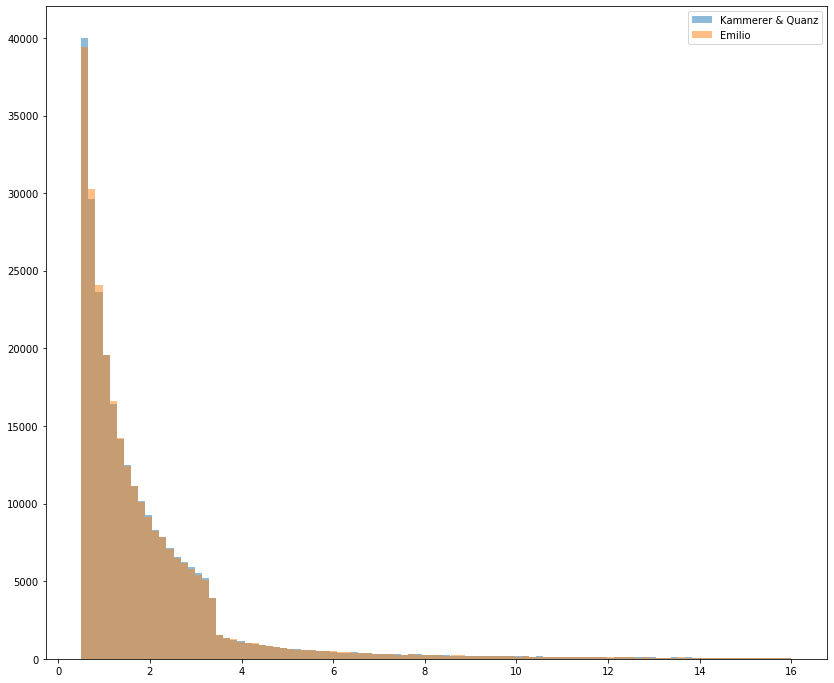

In [161]:
plt.figure(figsize = (14,12))
plt.hist(radii_jens, bins = 100, alpha = 0.5, label = "Kammerer & Quanz")
plt.hist(radii_emile, bins = 100, alpha = 0.5, label = "Emilio")
plt.legend()
plt.show()